Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [448]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [449]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [450]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

Tocnost klasifikacijskog modela: 1.00000

w =  [2.0999999999999996, -0.49999999999999989, -0.10000000000000007]


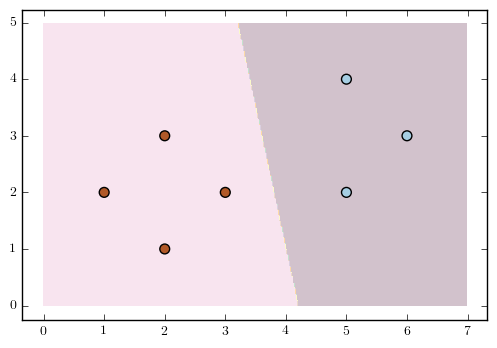

In [451]:
# Vaš kôd ovdje...

reg_1a = RidgeClassifier(alpha = 0).fit(seven_X, seven_y)
h_1a = lambda x: reg_1a.predict(x) >= 0

w_1a = []; w_1a.extend(reg_1a.intercept_);
for i in range(0, len(reg_1a.coef_)):
    w_1a.extend(reg_1a.coef_[i])


print 'Tocnost klasifikacijskog modela: %.5f' % accuracy_score(seven_y, reg_1a.predict(seven_X))
print '\nw = ', w_1a

mlutils.plot_2d_clf_problem(seven_X, seven_y, h_1a)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

Tocnost klasifikacijskog modela: 1.00000

w =  [2.1000000000000001, -0.50000000000000011, -0.099999999999999964]


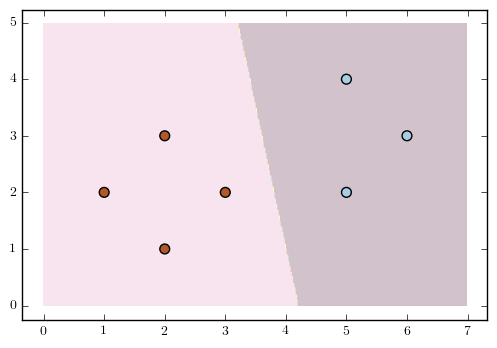

In [453]:
# Vaš kôd ovdje...
LinReg = LinearRegression().fit(seven_X, seven_y)

w_1a2 = [LinReg.intercept_];
w_1a2.extend(LinReg.coef_)

h_1a2 = lambda x: LinReg.predict(x) >= 0
h11 = []
for i in h_1a2(seven_X):
    if i:
        h11.append(1)
    else: h11.append(-1)

print 'Tocnost klasifikacijskog modela: %.5f' % accuracy_score(seven_y, h11)
print '\nw = ', w_1a2

mlutils.plot_2d_clf_problem(seven_X, seven_y, h_1a2)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [422]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

Tocnost klasifikacijskog modela: 0.875

w =  [0.84938704028021028, -0.40280210157618196, 0.30823117338003475]


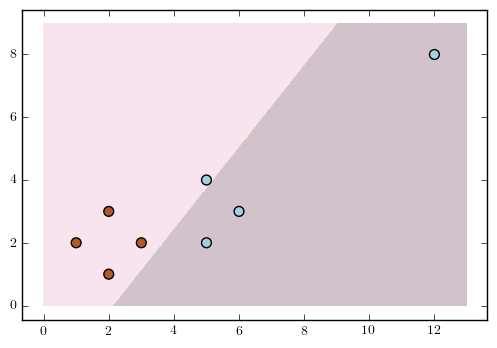

In [423]:
# Vaš kôd ovdje...
reg_1b = RidgeClassifier(alpha = 0).fit(outlier_X, outlier_y)
h_1b = lambda x: reg_1b.predict(x) >= 0

w_1b = []; w_1b.extend(reg_1b.intercept_);
for i in range(0, len(reg_1b.coef_)):
    w_1b.extend(reg_1b.coef_[i])


print 'Tocnost klasifikacijskog modela: %.3f' % accuracy_score(outlier_y, reg_1b.predict(outlier_X))
print '\nw = ', w_1b

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h_1b)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [424]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

Tocnost klasifikacijskog modela: 0.875

w =  [1.5050505050505047, -0.40404040404040392, -0.080808080808080912]


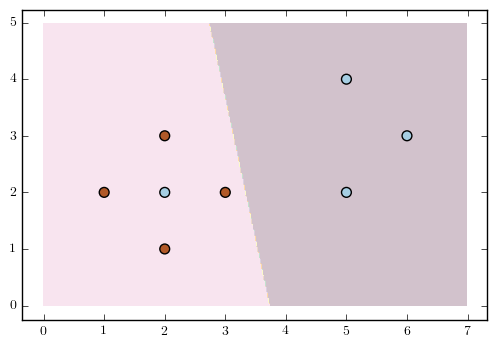

In [425]:
# Vaš kôd ovdje...

reg_1c = RidgeClassifier(alpha = 0).fit(unsep_X, unsep_y)
h_1c = lambda x: reg_1c.predict(x) >= 0

w_1c = []; w_1c.extend(reg_1c.intercept_);
for i in range(0, len(reg_1c.coef_)):
    w_1c.extend(reg_1c.coef_[i])

print 'Tocnost klasifikacijskog modela: %.3f' % accuracy_score(unsep_y, reg_1c.predict(unsep_X))
print '\nw = ', w_1c

mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h_1c)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [426]:
from sklearn.datasets import make_classification

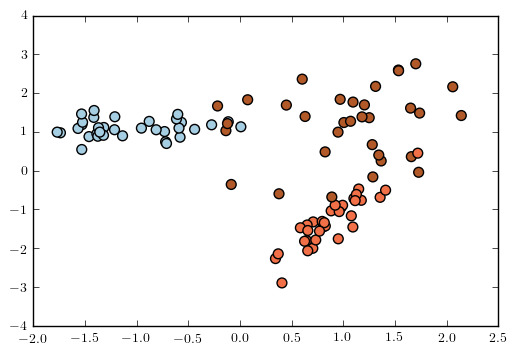

In [427]:
# Vaš kôd ovdje...

X2, y2 = make_classification(n_features=2, n_redundant=0, n_classes=3,  n_clusters_per_class=1)
mlutils.plot_2d_clf_problem(X2, y2)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

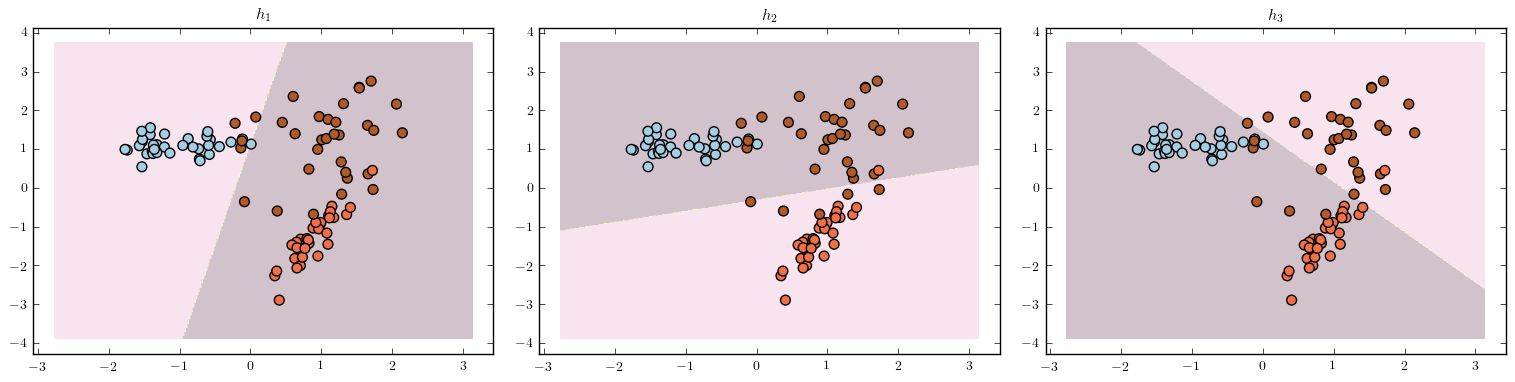

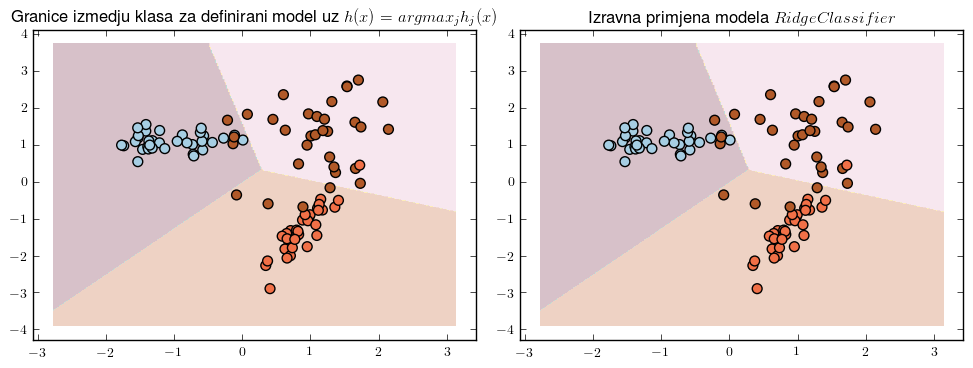

In [428]:
# Vaš kôd ovdje...

#Treniranje tri binarna klasifikatora
y21 = []; y22 = []; y23 = [];

for i in y2:
    if i == 0:
        y21.append(1)
        y22.append(-1)
        y23.append(-1)
    elif i==1:
        y21.append(-1)
        y22.append(1)
        y23.append(-1)
    elif i==2:
        y21.append(-1)
        y22.append(-1)
        y23.append(1)
    else:
        print 'error, promjeni broj klasa!'
        break
    
reg21 = LinearRegression().fit(X2, y21)
h21 = lambda x: reg21.predict(x) >= 0


reg22 = LinearRegression().fit(X2, y22)
h22 = lambda x: reg22.predict(x) >= 0


reg23 = LinearRegression().fit(X2, y23)
h23 = lambda x: reg23.predict(x) >= 0


plt.figure(figsize= (19, 4.2))
subplots_adjust(wspace=0.1) 
subplot(1,3,1)
mlutils.plot_2d_clf_problem(X2, y2, h21)
plt.title('$h_1$')
subplot(1,3,2)
mlutils.plot_2d_clf_problem(X2, y2, h22)
plt.title('$h_2$')
subplot(1,3,3)
mlutils.plot_2d_clf_problem(X2, y2, h23)
plt.title('$h_3$')

# Klasifikacija primjera u klasu za koju je h(x) maksimalan
h_argmax = lambda x: argmax([reg21.predict(x.reshape(1, -1)), reg22.predict(x.reshape(1, -1)), reg23.predict(x.reshape(1, -1))])
plt.figure(figsize= (12, 4));
subplots_adjust(wspace=0.1) 
subplot(1, 2, 1)
mlutils.plot_2d_clf_problem(X2, y2, h_argmax)
plt.title('Granice izmedju klasa za definirani model uz $h(x) = argmax_jh_j(x)$');


# Izravna primjena RidgeClassifier
reg2 = RidgeClassifier(alpha = 0).fit(X2, y2)
h_z2 = lambda x: reg2.predict(x)
subplot(1, 2, 2)
mlutils.plot_2d_clf_problem(X2, y2, h_z2);
plt.title('Izravna primjena modela $RidgeClassifier$');


### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [429]:
def sigm(x): return 1/(1 + exp(-x))

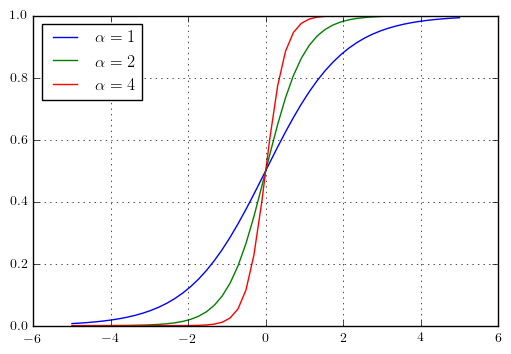

In [430]:
alph = [1, 2, 4]
x3a = linspace(-5, 5)

figure()
rc('text', usetex=True)
for i in alph:
    plot(x3a, sigm(x3a*i))
legend(['$\\alpha = 1$', '$\\alpha = 2$', '$\\alpha = 4$'], loc = 'best');
grid();


**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [431]:
from sklearn.preprocessing import PolynomialFeatures as PolyFeat
from sklearn.metrics import log_loss

def cross_entropy_loss(h_x, y):
    return -y * sp.log(h_x) - (1 - y) * sp.log(1 - h_x)

def lr_h(x, w):
    Phi = PolyFeat(1).fit_transform(x.reshape(1,-1))
    return sigm(Phi.dot(w))
    

In [432]:
def lr_train(X, y, eta = 0.01, max_iter = 2000, alpha = 0, epsilon = 0.0001, trace= False):
    w_tilda = zeros(shape(X)[1] + 1) # [w0, w1, w2]
    N = len(X) #broj primjera
    w_trace = [];
    err_init = epsilon**-1
    
    for i in range(0, max_iter):
        dw0 = 0; dw = zeros(shape(X)[1]);
        err = 0
        
        for j in range(0, N):
            h = lr_h(X[j], w_tilda)
            dw0 += h - y[j]
            dw += (h - y[j])*X[j]
            
            err += cross_entropy_loss(h, y[j])
        #err /= N
        if abs(err_init - err) < epsilon: 
            print 'HALT na i = ', i
            break
        
        else: err_init = err
            
        w_tilda[0] -= eta*dw0
        w_tilda[1:] = w_tilda[1:] * (1-eta*alpha) - eta*dw
        
        w_trace.extend(w_tilda)
        
    if trace:
        return w_tilda, w_trace
        
    else: return w_tilda
    

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [433]:
from sklearn.metrics import log_loss

def cross_entropy_error(X, y, w):
    Phi = PolyFeat(1).fit_transform(X)
    return log_loss(y, sigm(Phi.dot(w)))


#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

Pogreska unakrsne entropije E(w|D) =  0.0775171825249
[ 6.44150959 -2.11012128  0.53522851]


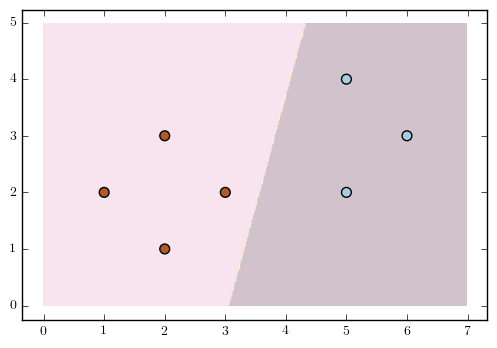

In [434]:
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

w3d = lr_train(seven_X, seven_y)
print 'Pogreska unakrsne entropije E(w|D) = ', cross_entropy_error(seven_X, seven_y, w3d)
print w3d

h3d = lambda x: lr_h(x, w3d) > 0.5

figure()
mlutils.plot_2d_clf_problem(seven_X, seven_y, h3d)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [435]:
from sklearn.metrics import zero_one_loss

[ 6.44150959 -2.11012128  0.53522851]
HALT na i =  1544
HALT na i =  1128


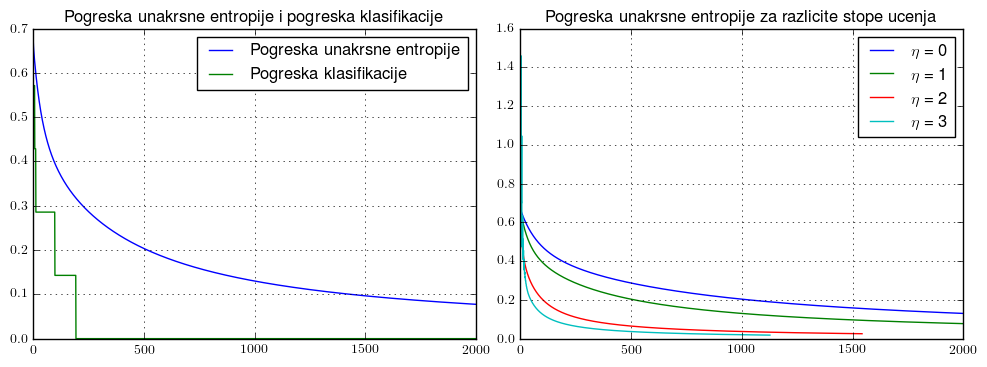

In [436]:
# Vaš kôd ovdje...
eta = [0.005, 0.01, 0.05, 0.1]
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
[w3e, w3e_trace] = lr_train(seven_X, seven_y, trace=True)
print w3e

Phi = PolyFeat(1).fit_transform(seven_X)
h_3e = lambda x: x >= 0.5

err_cross = []
err_class = []
err_gl = []

for k in range(0, len(w3e_trace), 3):
    err_cross.append(cross_entropy_error(seven_X, seven_y, w3e_trace[k:k+3]))
    err_class.append(zero_one_loss(seven_y, h_3e(sigm(Phi.dot(w3e_trace[k:k+3])))))
    
for i in eta:
    err = []
    [w3, w3_trace] = lr_train(seven_X, seven_y, i, trace=True)
    
    for j in range(0, len(w3_trace), 3):
        err.append(cross_entropy_error(seven_X, seven_y, w3_trace[j:j+3]))
    
    err_gl.append(err)
    
figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)
grid()
plot(err_cross); plot(err_class); title('Pogreska unakrsne entropije i pogreska klasifikacije');
legend(['Pogreska unakrsne entropije', 'Pogreska klasifikacije'], loc = 'best');

subplot(1,2,2)
grid()
for i in range(0, len(eta)):
    plot(err_gl[i], label = '$\eta$ = ' + str(i))
title('Pogreska unakrsne entropije za razlicite stope ucenja')
legend(loc = 'best');


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

In [437]:
from sklearn.linear_model import LogisticRegression as LR

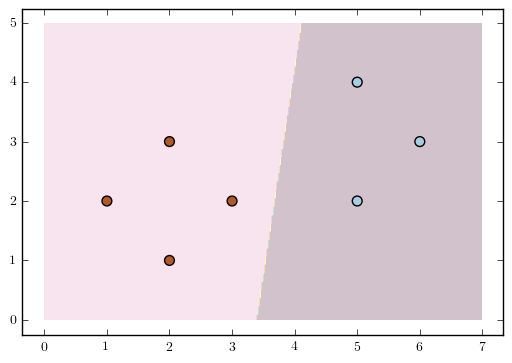

In [438]:
reg3f = LR(max_iter=2000, tol=0.0001, C=0.01**-1).fit(seven_X,seven_y)
h3f = lambda x : reg3f.predict(x)

figure(figsize(6.2, 4.2))
mlutils.plot_2d_clf_problem(seven_X,seven_y, h3f)

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

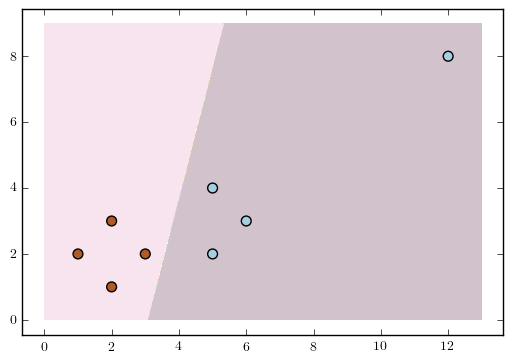

In [439]:
outlier_y = np.append(seven_y, 0)

w4a = lr_train(outlier_X, outlier_y, alpha = 0)
h4a = lambda x: lr_h(x, w4a) > 0.5

figure(figsize(6.2, 4.2))
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h4a)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


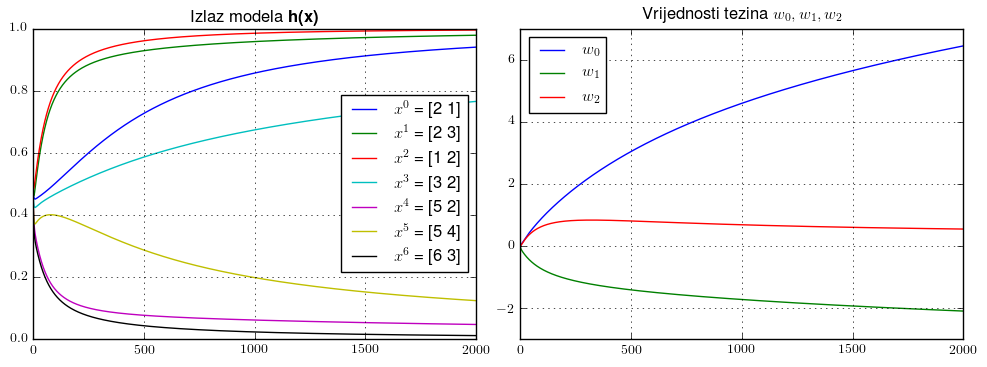

In [440]:
[w4b, w4b_trace] = lr_train(seven_X, seven_y, trace = True)

w0_4b = []; w1_4b = []; w2_4b = [];

for i in range(0, len(w4b_trace), 3):
    w0_4b.append(w4b_trace[i])
    w1_4b.append(w4b_trace[i+1])
    w2_4b.append(w4b_trace[i+2])
    
h_gl = []

for i in range(0, len(seven_X)):
    h = []

    for j in range(0, len(w4b_trace), 3):
        h.append(lr_h(seven_X[i], w4b_trace[j:j+3]))
        
    h_gl.append(h)
    
# 1) plot izlaza modela h(x)

figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)
grid()
for i in range(0, len(h_gl)):
    plot(h_gl[i], label = '$x^{%d}$ = ' % i + str(seven_X[i]) )

title('Izlaz modela $\\textbf{h(x)}$')
legend(loc = 'best') ;
    
# 2) Vrijednosti tezina w0, w1, w2
subplot(1,2,2)
grid()
plot(w0_4b); plot(w1_4b); plot(w2_4b);
legend(['$w_0$', '$w_1$', '$w_2$'], loc = 'best');
title('Vrijednosti tezina $w_0, w_1, w_2$');
      

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

HALT na i =  1315


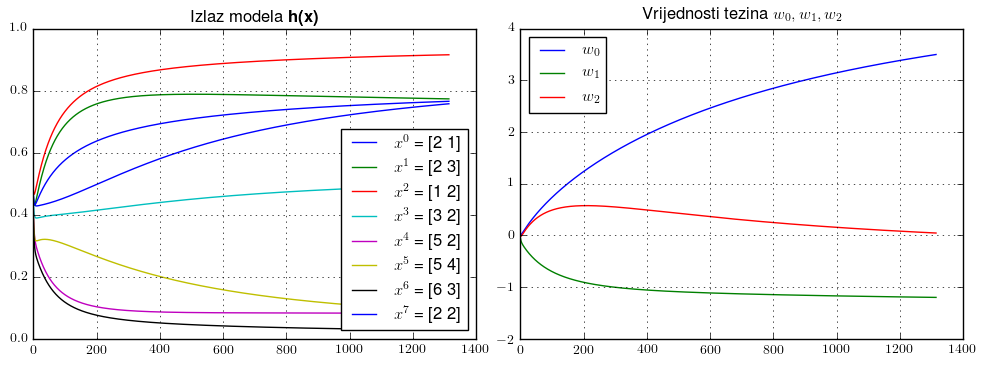

In [441]:
unsep_y = np.append(seven_y, 0)
[w4c, w4c_trace] = lr_train(unsep_X, unsep_y, trace = True)

w0_4c = []; w1_4c = []; w2_4c = [];

for i in range(0, len(w4c_trace), 3):
    w0_4c.append(w4c_trace[i])
    w1_4c.append(w4c_trace[i+1])
    w2_4c.append(w4c_trace[i+2])
    
h_gl = []

for i in range(0, len(unsep_X)):
    h = []

    for j in range(0, len(w4c_trace), 3):
        h.append(lr_h(unsep_X[i], w4c_trace[j:j+3]))
        
    h_gl.append(h)
    
# 1) plot izlaza modela h(x)

figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)
grid()
for i in range(0, len(h_gl)):
    plot(h_gl[i], label = '$x^{%d}$ = ' % i + str(unsep_X[i]) )

title('Izlaz modela $\\textbf{h(x)}$')
legend(loc = 'best') ;
    
# 2) Vrijednosti tezina w0, w1, w2
subplot(1,2,2)
grid()
plot(w0_4c); plot(w1_4c); plot(w2_4c);
legend(['$w_0$', '$w_1$', '$w_2$'], loc = 'best');
title('Vrijednosti tezina $w_0, w_1, w_2$');

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

HALT na i =  772
HALT na i =  230


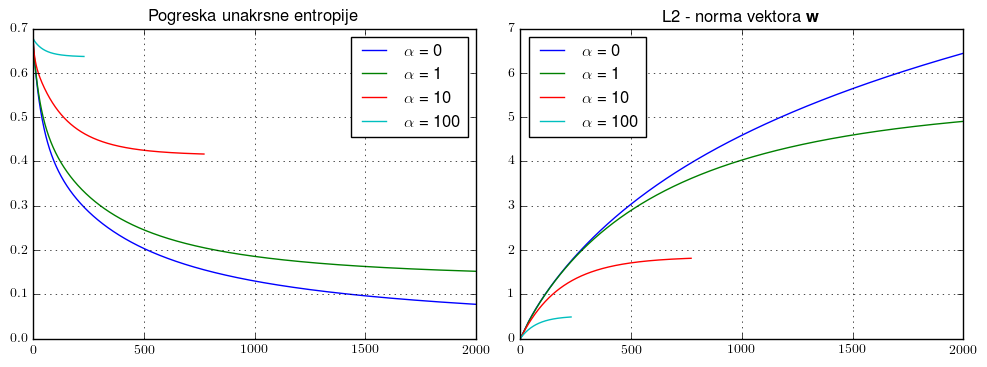

In [403]:
alpha5 = [0, 1, 10, 100]

err_gl = []; norm_gl = [];

for a in alpha5:
    [w5, w5_trace] = lr_train(seven_X, seven_y, alpha = a, trace = True)
    err = []; L2_norm = [];
    
    for k in range(0, len(w5_trace), 3):
        err.append(cross_entropy_error(seven_X, seven_y, w5_trace[k:k+3]))
        L2_norm.append(linalg.norm(w5_trace[k:k+1]))
    
    err_gl.append(err)
    norm_gl.append(L2_norm)
    
figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)
grid()
for i in range(0, len(err_gl)):
    plot(err_gl[i], label = '$\\alpha$ = '  + str(alpha5[i])  )
    
title('Pogreska unakrsne entropije')
legend(loc = 'best') ;

subplot(1,2,2)
grid()
for i in range(0, len(err_gl)):
    plot(norm_gl[i], label = '$\\alpha$ = ' + str(alpha5[i]) )
    
title('L2 - norma vektora $\\textbf{w}$')
legend(loc = 'best');


    

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [404]:
from sklearn.preprocessing import PolynomialFeatures as PolyFeat
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.datasets import make_classification

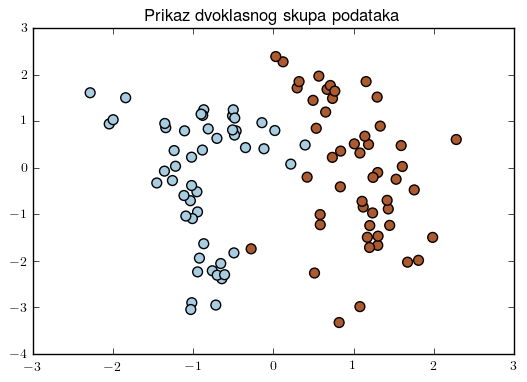

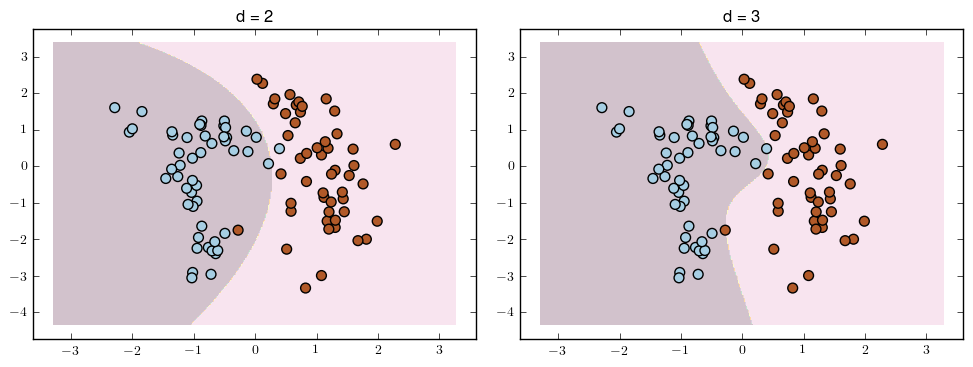

In [412]:
[X6a, y6a] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

figure(figsize(6.2, 4.2))
mlutils.plot_2d_clf_problem(X6a, y6a)
title('Prikaz dvoklasnog skupa podataka')

d = [2,3]
j = 1
figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
for i in d:
    subplot(1,2,j)
    poly = PolyFeat(i)
    Phi = poly.fit_transform(X6a)

    model = LogReg()
    logreg_d = model.fit(Phi, y6a)

    h_d = lambda x : model.predict(poly.transform(x))

    mlutils.plot_2d_clf_problem(X6a, y6a, h_d)
    title('d = ' + str(i))
    j += 1


In [413]:
# Vaš kôd ovdje...

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

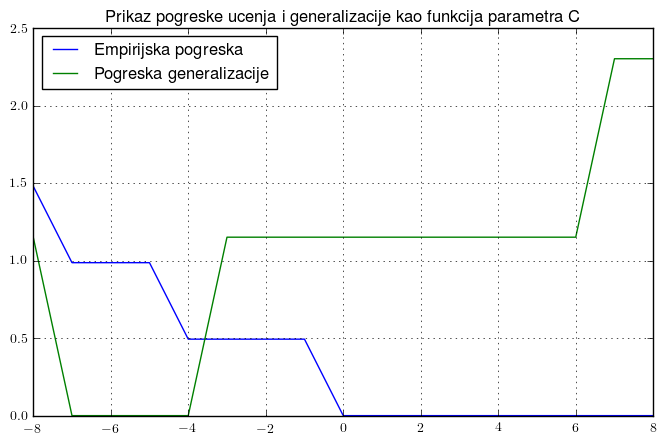

In [414]:
from sklearn.cross_validation import train_test_split as TTS

X_train, X_test, y_train, y_test = TTS(X6a, y6a, test_size = 0.3)
poly = PolyFeat(4)
Phi = poly.fit_transform(X_train)
emp_err = []; gen_err = [];
alpha6 = range(-8,9,1)

for a in alpha6:
    model = LogReg(C = 2.0 ** a)
    logreg6 = model.fit(Phi, y_train)
    h = lambda x : model.predict(poly.transform(x))
    
    emp_err.append(log_loss(y_train, h(X_train)))
    gen_err.append(log_loss(y_test, h(X_test)))

figure(figsize(8, 5))
plot(np.array(range(-8,9)), emp_err)
plot(np.array(range(-8,9)), gen_err)
legend(['Empirijska pogreska', 'Pogreska generalizacije'], loc = 'best')
title('Prikaz pogreske ucenja i generalizacije kao funkcija parametra C')
grid()

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?